# Business Case: Amazon
Amazon is facing a high surge of returns on some of its products, which has led to the downgrade of the company's credibility. The Data Science team has been tasked with the estimating if a customer will return the product or not based on the product description, transportation, importance and prices.

The column profile looks as follows,

| id | features | description |
| :-: | :-: | :-: |
| 01 | ID | ID of Customers |
| 02 |  Warehouse_block | The Company have big Warehouses which is divided in to block such as A,B,C,D,E |
| 03 | Mode_of_Shipment | The Company Ships the products in multiple way such as Ship, Flight and Road |
| 04 | Customer_care_calls | The number of calls made from enquiry for enquiry of the shipment |
| 05 | Customer_rating | The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best) |
| 06 | Cost_of_the_Product | Price of the Product |
| 07 | Prior_purchases | The Number of Prior Purchases of the customer |
| 08 | Product_importance | The company has categorized the product in the various parameter such as low, medium, high. |
| 09 | Gender | If Customer is a Male or Female |
| 10 | Discount_offered | Discount offered on that specific product |
| 11 | Weight_in_gms | It is the weight in grams |
| 12 | Returned | It is the target variable, where 1 Indicates that the product is returned |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amazon.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Returned
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.shape

(10999, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Returned             10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# separating the features and label
x = df.drop(columns = ["ID", "Returned"])
y = df["Returned"]
x.shape, y.shape

((10999, 10), (10999,))

In [6]:
# splitting the data into train, validation and test set
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.2, random_state = 42)
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((7039, 10), (7039,), (1760, 10), (1760,), (2200, 10), (2200,))

# EDA

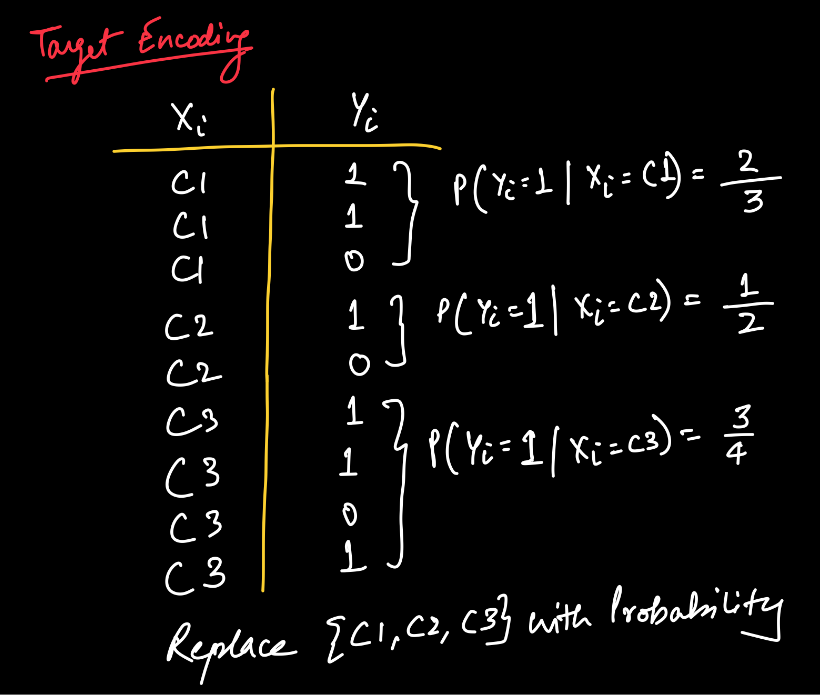

### Which encoding to use to transform the categorical features?
